In [115]:
import yfinance as yf
stocks = ["MSFT", "GOOGL", "META", "ORCL", "NFLX"]
print(type(data["Close"]))

import numpy as np


<class 'pandas.core.frame.DataFrame'>


# MSCI ACWI Commodity Producers Index (USD) Top 10 stocks
Add stock screener

In [100]:
data = yf.download(stocks, start= "2020-01-01", end= "2025-07-02", auto_adjust= True) #YYYY-MM-DD
# auto_adjust = True automatically adjusts historical stock prices for splits and dividends. 
# This ensures that the price data reflects the true performance of the stock over time.

[*********************100%***********************]  5 of 5 completed


In [101]:
print(data.shape)
print(data.head())

(1381, 25)
Price           Close                                                 \
Ticker          GOOGL        META        MSFT        NFLX       ORCL   
Date                                                                   
2020-01-02  68.026024  208.635391  153.042313  329.809998  49.642700   
2020-01-03  67.670158  207.531464  151.136688  325.899994  49.467865   
2020-01-06  69.473839  211.440048  151.527313  335.829987  49.725510   
2020-01-07  69.339645  211.897522  150.145706  330.750000  49.835922   
2020-01-08  69.833183  214.045746  152.537277  339.260010  50.030018   

Price            High                                                 ...  \
Ticker          GOOGL        META        MSFT        NFLX       ORCL  ...   
Date                                                                  ...   
2020-01-02  68.026024  208.645331  153.147124  329.980011  49.651900  ...   
2020-01-03  68.278016  209.252020  152.403944  329.859985  49.734713  ...   
2020-01-06  69.499184  211.

In [103]:
print(data['Close'].info())
data['Close'].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1381 entries, 2020-01-02 to 2025-07-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOGL   1381 non-null   float64
 1   META    1381 non-null   float64
 2   MSFT    1381 non-null   float64
 3   NFLX    1381 non-null   float64
 4   ORCL    1381 non-null   float64
dtypes: float64(5)
memory usage: 64.7 KB
None


Ticker
GOOGL    0
META     0
MSFT     0
NFLX     0
ORCL     0
dtype: int64

In [104]:
close = data['Close']

# **Portfolio Optimization via Monte Carlo Simulation**

In [105]:
returns = close.pct_change(fill_method=None).dropna()
returns # in rates

Ticker,GOOGL,META,MSFT,NFLX,ORCL
Date,,,,,
2020-01-03,-0.005231,-0.005291,-0.012452,-0.011855,-0.003522
2020-01-06,0.026654,0.018834,0.002585,0.030469,0.005208
2020-01-07,-0.001932,0.002164,-0.009118,-0.015127,0.002220
2020-01-08,0.007118,0.010138,0.015928,0.025729,0.003895
2020-01-09,0.010498,0.014311,0.012493,-0.010611,0.004618
...,...,...,...,...,...
2025-06-25,0.023445,-0.004942,0.004407,-0.003018,-0.021136
2025-06-26,0.016757,0.024567,0.010523,0.024638,0.009966
2025-06-27,0.028754,0.010384,-0.003036,0.012589,-0.012123


# Generating Random Weights for the portfolio
 $ Constraint: \sum_{i=1}^{N} w_{i} = 1 $

In [90]:
def gen_weights(data):
    w = np.random.random(data.shape[1])
    weights = w/sum(w)
    return weights

w = gen_weights(returns)
w

array([0.17964532, 0.145485  , 0.24206565, 0.22982292, 0.20298111])

# Calculate Expected Returns (Annualized) for the Porfolio
        
$$ E(R_{p}) = \sum_{i=1}^{N} w_{i} R_{i} $$


In [92]:
def portfolio_returns(data,weights):
    return np.sum(data.mean()*252*weights)

portfolio_returns(returns,w)

0.29993006746807604

# Visualising the Covariance (Annualized) Matrix

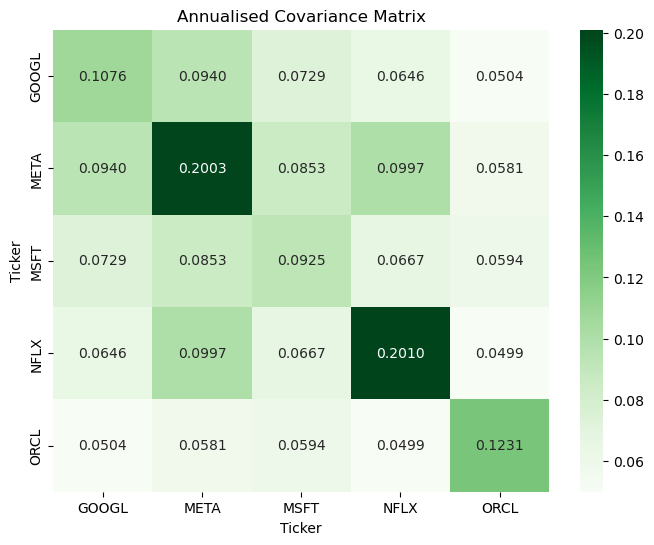

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
annualized_cov = returns.cov()*252

plt.figure(figsize=(8,6))
sns.heatmap(annualized_cov,annot=True,cmap='Greens', fmt='.4f')
plt.title("Annualised Covariance Matrix")
plt.show()

# Calculate Standard Deviation of Portolio Returns
$$ \sigma_p^2 = \sqrt{\mathbf{w}^\top \boldsymbol{\Sigma} \, \mathbf{w}} $$ 
where $ \boldsymbol{\Sigma} $ is the Covariance Matrix

In [113]:
def portfolio_std(annualized_cov,w):
    return np.sqrt(w.T @ annualized_cov @ w)

portfolio_std(annualized_cov,w)

0.2759646071405255

# Running the Monte Carlo Simulation and Plotting

In [117]:
MC_returns = []
MC_std = []
MC_weights = []
for sim in range(6000):
    w = gen_weights(returns)
    MC_weights.append(w)
    MC_returns.append(portfolio_returns(returns,w))
    MC_std.append(portfolio_std(annualized_cov,w))


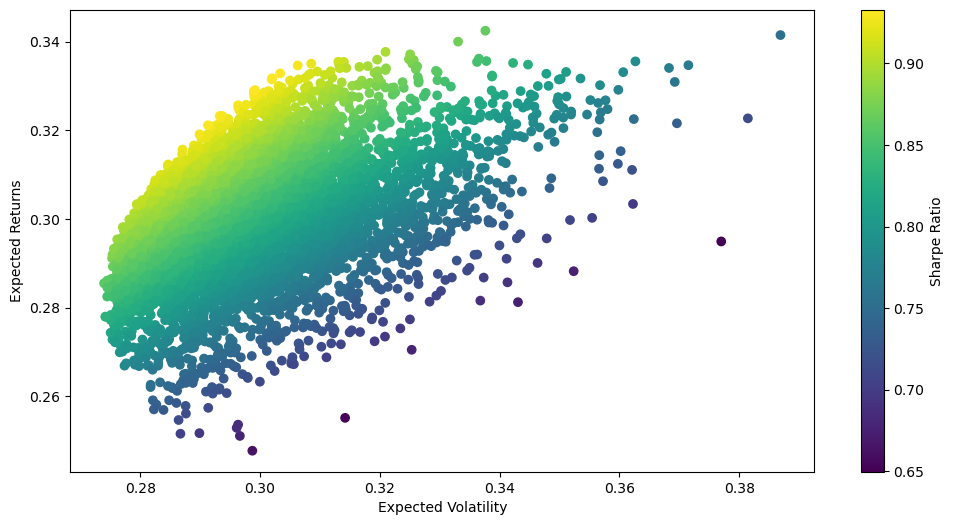

In [138]:
risk_free_rate = 0.05
MC_sharpe_ratios = (np.array(MC_returns) - (np.ones(len(MC_returns)) * risk_free_rate))/np.array(MC_std)
plt.figure(figsize=(12,6))
plt.scatter(x = MC_std,y = MC_returns, c = MC_sharpe_ratios)
plt.ylabel('Expected Returns')
plt.xlabel('Expected Volatility')
plt.colorbar(label="Sharpe Ratio")

In [140]:
def max_sharpe_ratio_portfolio(MC_weights,MC_sharpe_ratios):
    return MC_weights[np.argmax(MC_sharpe_ratios)]

max_sharpe_ratio_portfolio(MC_weights,MC_sharpe_ratios)

array([0.04020378, 0.15653394, 0.010457  , 0.25133469, 0.54147058])